# Test08

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

In [47]:
global_factor = 4

def image_open(name):
    location='from_camera/test08/'+name+'.png'
    image_im = Image.open(location)
    realsize=image_im.size
    newsize=tuple(int(ti/global_factor) for ti in realsize)
    image_im=image_im.resize(newsize,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    return image_im

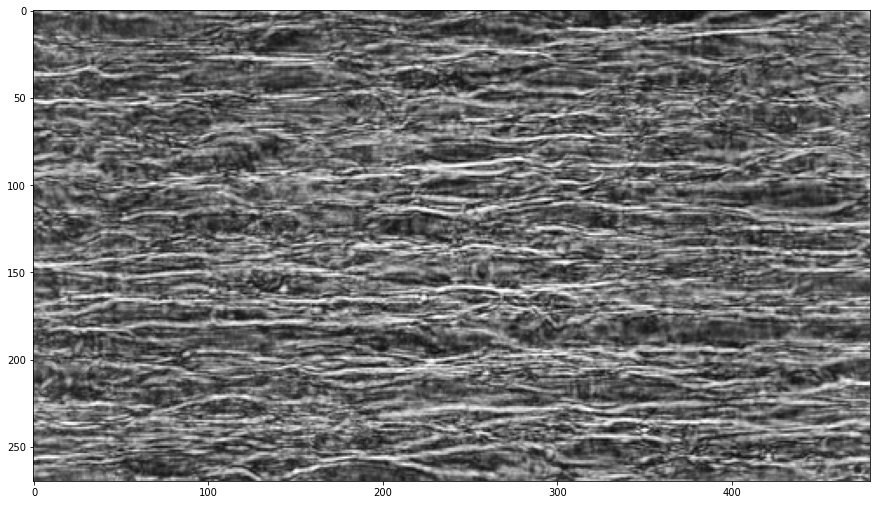

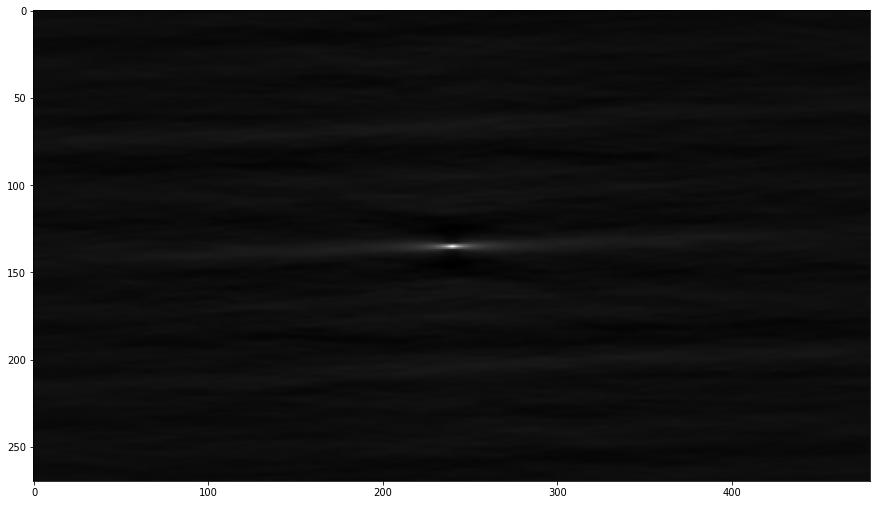

In [48]:
h = image_open('h') - image_open('h_black')
h -= h.mean()
plt.figure(figsize=(15,15))
plt.imshow(h,cmap='gray')
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(signal.fftconvolve(h,np.flip(h),mode='same'),cmap='gray')
plt.show()

92.9587901234568


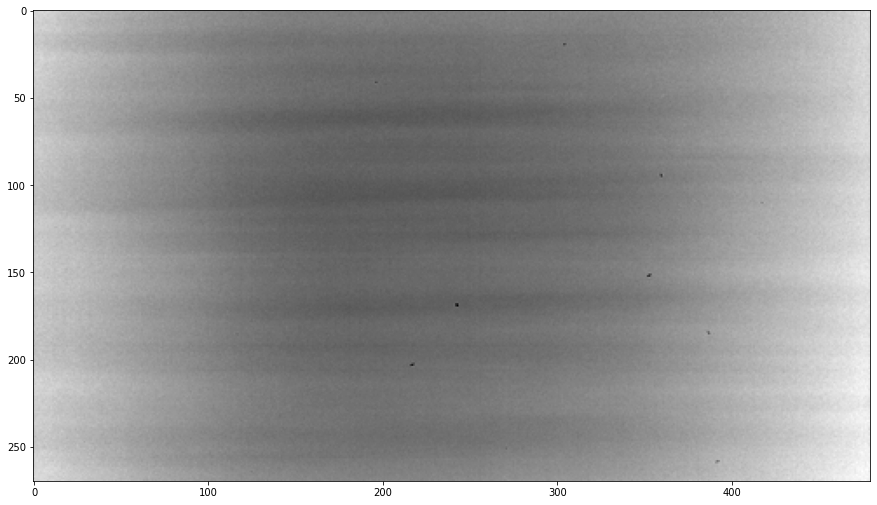

In [62]:

allblack = np.zeros(h.shape)
numberImages = 5
for i in range(numberImages):
    name='black'+str(i)
    allblack += image_open(name)

allblack /= numberImages

print(allblack.mean())

plt.figure(figsize=(15,15))
plt.imshow(allblack,cmap='gray')
plt.show()

In [63]:
def estimation(name):
    imag=image_open(name)
    imag_hat=signal.fftconvolve(imag-allblack,np.flip(h),mode='same')
    # plt.imshow(imag_hat,cmap='gray')
    # plt.title(name)
    # plt.show()
    return imag_hat

In [64]:
# dotcenter = estimation('1')
# dotcenter = estimation('3')
# dotcenter = estimation('5')
# dotcenter = estimation('7')
# dotcenter = estimation('9')
# dotcenter = estimation('11')

Text(0.5, 1.0, '11')

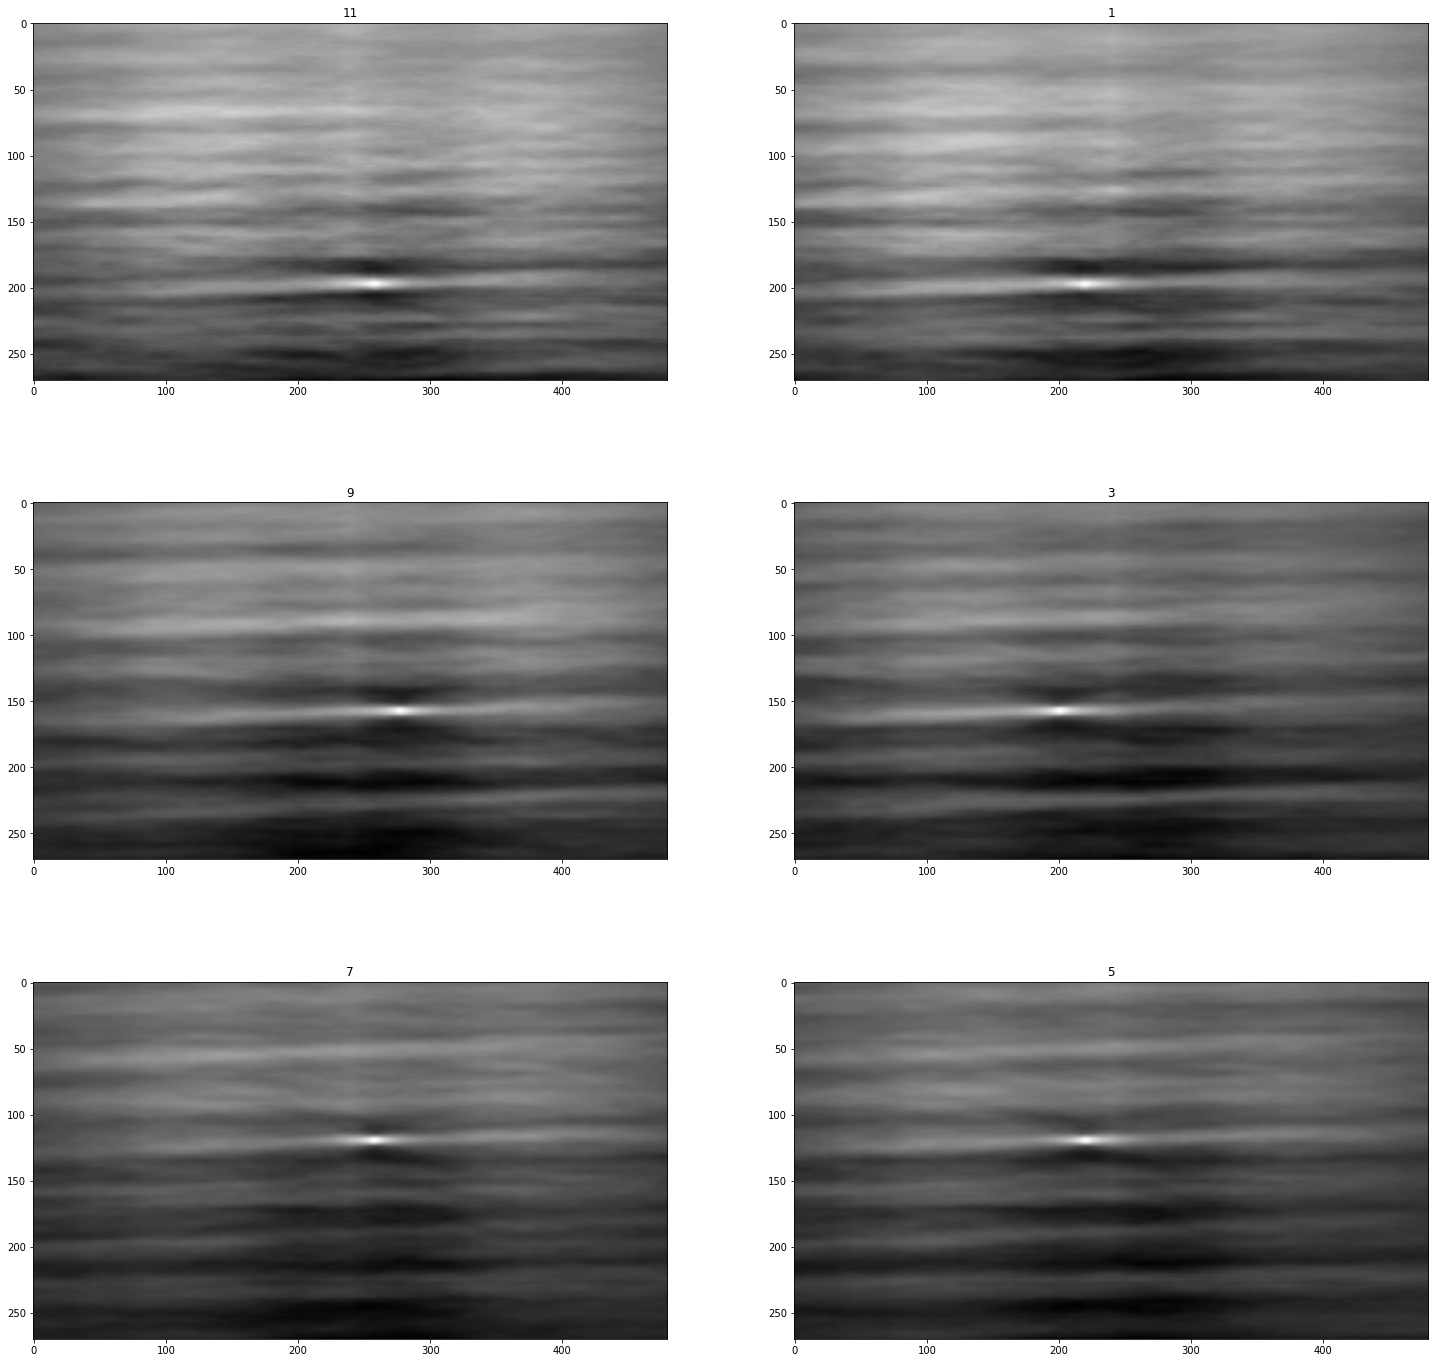

In [61]:
fig = plt.figure(figsize=(25,25))
fig.add_subplot(3, 2, 2)
plt.imshow(estimation('1'),cmap='gray')
plt.title('1')
fig.add_subplot(3, 2, 4)
plt.imshow(estimation('3'),cmap='gray')
plt.title('3')
fig.add_subplot(3, 2, 6)
plt.imshow(estimation('5'),cmap='gray')
plt.title('5')
fig.add_subplot(3, 2, 5)
plt.imshow(estimation('7'),cmap='gray')
plt.title('7')
fig.add_subplot(3, 2, 3)
plt.imshow(estimation('9'),cmap='gray')
plt.title('9')
fig.add_subplot(3, 2, 1)
plt.imshow(estimation('11'),cmap='gray')
plt.title('11')